In [3]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("wyattowalsh/basketball")


/opt/anaconda3/envs/data-fa25/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset Summary

## The dataset contains comprehensive NBA game-level statistics from 1946 to present

## Their is multiple rows and 55 columns for season.

## I predict that Home court advantage has a clear effect on all stats, boosting them all overall. This dataset is perfect for this and includes everything including home court +- and away +-

## I plan on diving into mainly the Cleveland Cavaliers personal home stats and seeing how they compare to the rest of the leagues.

## Source: Kaggle dataset "wyattowalsh/basketball"

## Method: Kaggle API integration via kagglehub Python library

## Access: Direct download from authenticated Kaggle repository

## Format: Multiple CSV files with SQLite backup



In [4]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [6]:
print("Files in the dataset:")
for file in os.listdir(path):
    print(f" - {file}")

# If there are subdirectories, explore those too
for root, dirs, files in os.walk(path):
    for file in files:
        print(f" - {os.path.join(root, file)}")

Files in the dataset:
 - nba.sqlite
 - csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/nba.sqlite
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/play_by_play.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_info.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/player.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team_history.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team_info_common.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/inactive_players.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/other_stats.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/

In [7]:
# Load multiple CSV files into a dictionary
csv_files = {
    'players': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/player.csv',
    'common_player_info': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/common_player_info.csv',
    'games': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game.csv',
    'play_by_play': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/play_by_play.csv',
    'game_summary': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_summary.csv',
    'teams': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team.csv',
    'draft_history': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/draft_history.csv'
}

# Load all datasets
datasets = {}
for name, file_path in csv_files.items():
    try:
        datasets[name] = pd.read_csv(file_path)
        print(f"✅ Loaded {name}: {datasets[name].shape}")
    except Exception as e:
        print(f" Failed to load {name}: {e}")

✅ Loaded players: (4831, 5)
✅ Loaded common_player_info: (4171, 33)
✅ Loaded games: (65698, 55)
✅ Loaded play_by_play: (13592899, 34)
✅ Loaded game_summary: (58110, 14)
✅ Loaded teams: (30, 7)
✅ Loaded draft_history: (7990, 14)


In [14]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game.csv')
teams = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team.csv')
line_score = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/line_score.csv')
game_summary = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_summary.csv')

print("Datasets loaded:")
print(f"Games: {games.shape}")
print(f"Teams: {teams.shape}")
print(f"Line Scores: {line_score.shape}")
print(f"Game Summary: {game_summary.shape}")

Datasets loaded:
Games: (65698, 55)
Teams: (30, 7)
Line Scores: (58053, 43)
Game Summary: (58110, 14)


In [15]:
print("GAMES DATA COLUMNS:")
print(games.columns.tolist())
print("\nGAMES DATA SAMPLE:")
display(games.head(3))

print("\nChecking for home/away columns:")
for col in games.columns:
    if 'home' in col.lower() or 'away' in col.lower() or 'visitor' in col.lower():
        print(f" - {col}")

GAMES DATA COLUMNS:
['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home', 'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home', 'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away', 'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away', 'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away', 'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away', 'season_type']

GAMES DATA SAMPLE:


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season



Checking for home/away columns:
 - team_id_home
 - team_abbreviation_home
 - team_name_home
 - matchup_home
 - wl_home
 - fgm_home
 - fga_home
 - fg_pct_home
 - fg3m_home
 - fg3a_home
 - fg3_pct_home
 - ftm_home
 - fta_home
 - ft_pct_home
 - oreb_home
 - dreb_home
 - reb_home
 - ast_home
 - stl_home
 - blk_home
 - tov_home
 - pf_home
 - pts_home
 - plus_minus_home
 - video_available_home
 - team_id_away
 - team_abbreviation_away
 - team_name_away
 - matchup_away
 - wl_away
 - fgm_away
 - fga_away
 - fg_pct_away
 - fg3m_away
 - fg3a_away
 - fg3_pct_away
 - ftm_away
 - fta_away
 - ft_pct_away
 - oreb_away
 - dreb_away
 - reb_away
 - ast_away
 - stl_away
 - blk_away
 - tov_away
 - pf_away
 - pts_away
 - plus_minus_away
 - video_available_away


# Analysis Plan
## I plan on starting with simple win percentage differences in home v away games, and then going into more advanced statistices such as defensive efficiency, shooting percentages, and more!

=== HOME vs AWAY WIN RATES ===
Home teams win: 61.9% of games
Away teams win: 38.1% of games
Home advantage: 23.7%


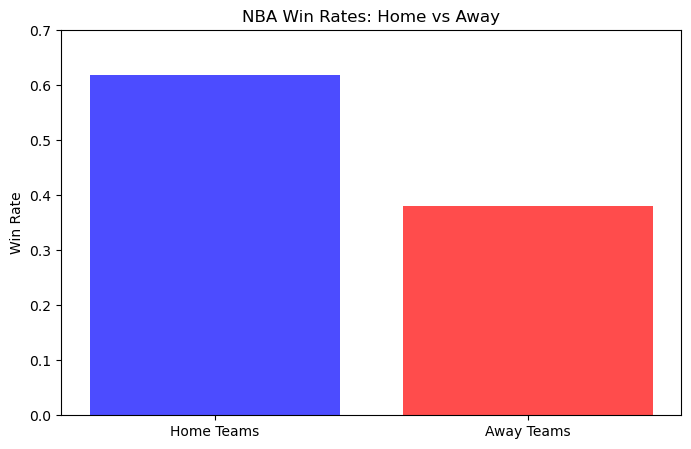

In [16]:
# Calculate basic win rates
home_wins = (games['wl_home'] == 'W').sum()
away_wins = (games['wl_away'] == 'W').sum()
total_games = len(games)

home_win_rate = home_wins / total_games
away_win_rate = away_wins / total_games

print("=== HOME vs AWAY WIN RATES ===")
print(f"Home teams win: {home_win_rate:.1%} of games")
print(f"Away teams win: {away_win_rate:.1%} of games")
print(f"Home advantage: {home_win_rate - away_win_rate:.1%}")

# Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.bar(['Home Teams', 'Away Teams'], [home_win_rate, away_win_rate], 
               color=['blue', 'red'], alpha=0.7)


plt.title('NBA Win Rates: Home vs Away')
plt.ylabel('Win Rate')
plt.ylim(0, 0.7)
plt.show()


OffensiveState


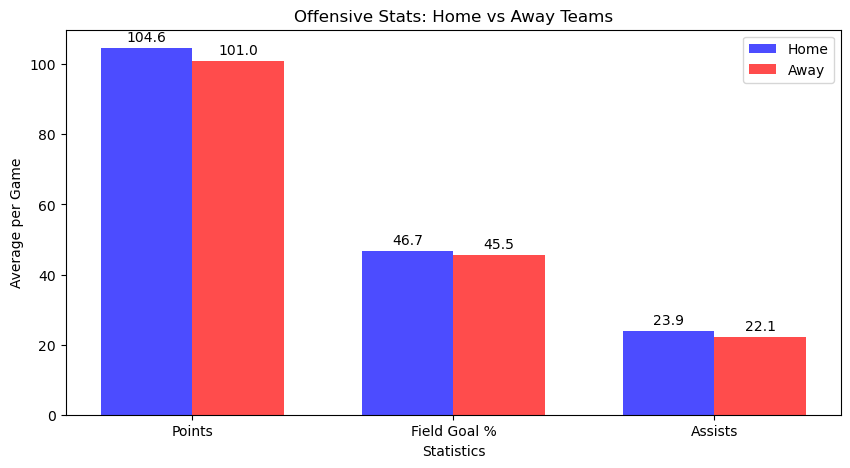

Home teams score 104.6 points per game
Away teams score 101.0 points per game
Home teams shoot 46.7% FG
Away teams shoot 45.5% FG


In [17]:
print("\nOffensiveState")

# 3 Key offensive Stats
offensive_stats = ['Points', 'Field Goal %', 'Assists']
home_values = [
    games['pts_home'].mean(),
    games['fg_pct_home'].mean() * 100,  # Convert to percentage
    games['ast_home'].mean()
]
away_values = [
    games['pts_away'].mean(),
    games['fg_pct_away'].mean() * 100,
    games['ast_away'].mean()
]

#Plot
plt.figure(figsize=(10, 5))
x_pos = range(len(offensive_stats))
width = 0.35

plt.bar([x - width/2 for x in x_pos], home_values, width, label='Home', color='blue', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], away_values, width, label='Away', color='red', alpha=0.7)

plt.xlabel('Statistics')
plt.ylabel('Average per Game')
plt.title('Offensive Stats: Home vs Away Teams')
plt.xticks(x_pos, offensive_stats)
plt.legend()

# Add value labels
for i, (h, a) in enumerate(zip(home_values, away_values)):
    plt.text(i - width/2, h + 1, f'{h:.1f}', ha='center', va='bottom')
    plt.text(i + width/2, a + 1, f'{a:.1f}', ha='center', va='bottom')

plt.show()

# Print the numbers
print(f"Home teams score {home_values[0]:.1f} points per game")
print(f"Away teams score {away_values[0]:.1f} points per game")
print(f"Home teams shoot {home_values[1]:.1f}% FG")
print(f"Away teams shoot {away_values[1]:.1f}% FG")

## Same Thing for Defensive Stats now. 


DefensiveStats


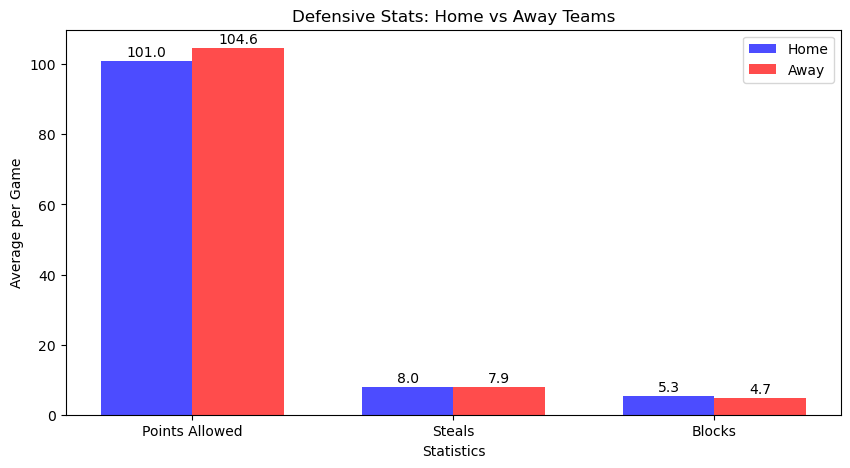

Home teams allow 101.0 points per game
Away teams allow 104.6 points per game
Home teams get 8.0 steals per game
Away teams get 7.9 steals per game


In [27]:
print("\nDefensiveStats")

# 3 Important defensive stats
defensive_stats = ['Points Allowed', 'Steals', 'Blocks']
home_defense = [
    games['pts_away'].mean(),  
    games['stl_home'].mean(),
    games['blk_home'].mean()
]
away_defense = [
    games['pts_home'].mean(), 
    games['stl_away'].mean(),
    games['blk_away'].mean()
]

# Plot
plt.figure(figsize=(10, 5))
x_pos = range(len(defensive_stats))
width = 0.35

plt.bar([x - width/2 for x in x_pos], home_defense, width, label='Home', color='Blue', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], away_defense, width, label='Away', color='Red', alpha=0.7)

plt.xlabel('Statistics')
plt.ylabel('Average per Game')
plt.title('Defensive Stats: Home vs Away Teams')
plt.xticks(x_pos, defensive_stats)
plt.legend()

# Adding Labels
for i, (h, a) in enumerate(zip(home_defense, away_defense)):
    plt.text(i - width/2, h + 0.5, f'{h:.1f}', ha='center', va='bottom')
    plt.text(i + width/2, a + 0.5, f'{a:.1f}', ha='center', va='bottom')

plt.show()


print(f"Home teams allow {home_defense[0]:.1f} points per game")
print(f"Away teams allow {away_defense[0]:.1f} points per game")
print(f"Home teams get {home_defense[1]:.1f} steals per game")
print(f"Away teams get {away_defense[1]:.1f} steals per game")

## Diving deeper into offensive stats, I believe that teams will shoot much better at their home court. I will start with the NBA, then dive into 

In [18]:
print("Looking for shooting-related columns:")
shooting_cols = []
for col in games.columns:
    if any(term in col.lower() for term in ['pct', 'fg', 'ft', 'three', '3p']):
        print(f" - {col}")
        shooting_cols.append(col)

# Displaying names
display(games[shooting_cols].head(3))

Looking for shooting-related columns:
 - fgm_home
 - fga_home
 - fg_pct_home
 - fg3m_home
 - fg3a_home
 - fg3_pct_home
 - ftm_home
 - fta_home
 - ft_pct_home
 - fgm_away
 - fga_away
 - fg_pct_away
 - fg3m_away
 - fg3a_away
 - fg3_pct_away
 - ftm_away
 - fta_away
 - ft_pct_away


,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away
0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769
1,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN
2,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN


In [20]:
# Removing NaN values (Not a Number)

shooting_categories = {
    'Field Goal %': ('fg_pct_home', 'fg_pct_away'),
    '3-Point %': ('fg3_pct_home', 'fg3_pct_away'),
    'Free Throw %': ('ft_pct_home', 'ft_pct_away')
}

In [23]:
#Finding averages 

shooting_data = []
for category, (home_col, away_col) in shooting_categories.items():
    # Use dropna() to ignore missing values
    home_avg = games[home_col].dropna().mean() * 100  # Convert to percentage
    away_avg = games[away_col].dropna().mean() * 100
    difference = home_avg - away_avg
    
    # Count of games with this stat available
    home_games_with_stat = games[home_col].notna().sum()
    away_games_with_stat = games[away_col].notna().sum()
    
    shooting_data.append({
        'Category': category,
        'Home': home_avg,
        'Away': away_avg,
        'Difference': difference,
        'Home_Games': home_games_with_stat,
        'Away_Games': away_games_with_stat
    })
    # Converting to a DataFrame
shooting_df = pd.DataFrame(shooting_data)

print("Shooting Percentages Comparison")
print(f"Based on {len(games)} total games")
print()


Shooting Percentages Comparison
Based on 65698 total games



In [24]:
display(shooting_df[['Category', 'Home', 'Away', 'Difference']])

,Category,Home,Away,Difference
0,Field Goal %,46.732098,45.490910,1.241188
1,3-Point %,34.613596,33.663921,0.949675
2,Free Throw %,75.541759,75.266578,0.275181


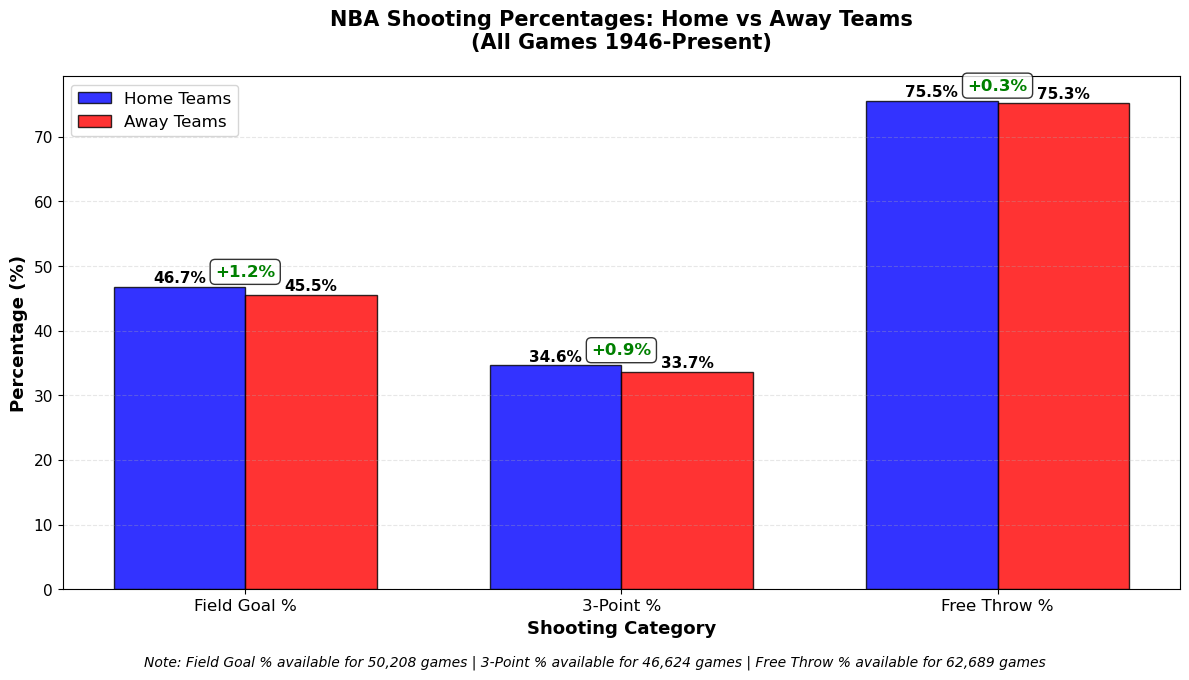

In [29]:
 # In Depth Visualization including percent differences
plt.figure(figsize=(12, 7))
x_pos = np.arange(len(shooting_df))
width = 0.35

# Create bars
bars1 = plt.bar(x_pos - width/2, shooting_df['Home'], width, 
                label='Home Teams', color='Blue', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x_pos + width/2, shooting_df['Away'], width, 
                label='Away Teams', color='Red', alpha=0.8, edgecolor='black')

# Customize the plot
plt.xlabel('Shooting Category', fontsize=13, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=13, fontweight='bold')
plt.title('NBA Shooting Percentages: Home vs Away Teams\n(All Games 1946-Present)', 
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(x_pos, shooting_df['Category'], fontsize=12)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                 f'{height:.1f}%', ha='center', va='bottom', 
                 fontsize=11, fontweight='bold')

# Add the advantage line with arrows
for i, row in shooting_df.iterrows():
    advantage = row['Difference']
    advantage_text = f"+{advantage:.1f}%" if advantage > 0 else f"{advantage:.1f}%"
    
    # Position above the higher bar
    max_height = max(row['Home'], row['Away'])
    plt.text(i, max_height + 1.2, 
             advantage_text, ha='center', va='bottom', 
             fontweight='bold', fontsize=12,
             color='green' if advantage > 0 else 'red',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Add sample size info
plt.figtext(0.5, 0.01, 
            f"Note: Field Goal % available for {shooting_df.loc[0, 'Home_Games']:,} games | "
            f"3-Point % available for {shooting_df.loc[1, 'Home_Games']:,} games | "
            f"Free Throw % available for {shooting_df.loc[2, 'Home_Games']:,} games",
            ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout for footer
plt.show()

## This is not quite the results I expected, only around a 1% increase in shooting in home games v away games. My hypothesis was correct, but not by any great deal. 

In [32]:
# Print summary statistics
print("\n" + "="*80)
print("                                SUMMARY STATISTICS")
print("="*80)
for _, row in shooting_df.iterrows():
    print(f"\n{row['Category']}:")
    print(f"  Home: {row['Home']:.1f}%")
    print(f"  Away: {row['Away']:.1f}%")
    print(f"  Home Advantage: {row['Difference']:+.1f}%")
    print(f"  Relative Advantage: {(row['Difference']/row['Away']*100):+.1f}%")
    print(f"  Games with data: Home={row['Home_Games']:,}, Away={row['Away_Games']:,}")


                                SUMMARY STATISTICS

Field Goal %:
  Home: 46.7%
  Away: 45.5%
  Home Advantage: +1.2%
  Relative Advantage: +2.7%
  Games with data: Home=50,208, Away=50,209

3-Point %:
  Home: 34.6%
  Away: 33.7%
  Home Advantage: +0.9%
  Relative Advantage: +2.8%
  Games with data: Home=46,624, Away=46,736

Free Throw %:
  Home: 75.5%
  Away: 75.3%
  Home Advantage: +0.3%
  Relative Advantage: +0.4%
  Games with data: Home=62,689, Away=62,692


## Now Lets Dive into the Cleveland Cavaliers and how their home court advantage compares to the rest of the NBA's

In [38]:
# Setting up Cavs Data 
# Set target team to Cleveland Cavaliers
Target_team = "Cleveland Cavaliers"

print(f"\n=== ANALYZING {target_team.upper()} ===")
print("="*50)

# Filter for Cleveland Cavaliers games
cavs_home_games = games[games['team_name_home'] == target_team]
cavs_away_games = games[games['team_name_away'] == target_team]

print(f"{target_team} Home Games: {len(cavs_home_games):,}")
print(f"{target_team} Away Games: {len(cavs_away_games):,}")


=== ANALYZING CLEVELAND CAVALIERS ===
Cleveland Cavaliers Home Games: 2,146
Cleveland Cavaliers Away Games: 2,112


In [39]:
# Cavs Shooting performances at Home 
if len(cavs_home_games) > 0:
    # Calculate Cavs shooting percentages at home
    cavs_home_shooting = {}
    for category, (home_col, away_col) in shooting_categories.items():
        if home_col in cavs_home_games.columns:
            # Use dropna() to handle missing values
            cavs_home_shooting[category] = cavs_home_games[home_col].dropna().mean() * 100
            print(f"  {category}: {cavs_home_shooting[category]:.1f}% (based on {cavs_home_games[home_col].notna().sum()} games)")

  Field Goal %: 46.6% (based on 1776 games)
  3-Point %: 36.1% (based on 1648 games)
  Free Throw %: 75.4% (based on 2146 games)


In [46]:
# All other NBA teams home information together 
nba_home_shooting = {}

for category, (home_col, away_col) in shooting_categories.items():
    if home_col in games.columns:
        nba_home_shooting[category] = games[home_col].dropna().mean() * 100

In [52]:
# Comparison DataFrame

comparison_data = []

for category in shooting_categories.keys():
    cavs_val = cavs_home_shooting.get(category, None)
    nba_val = nba_home_shooting.get(category, None)
    
    if pd.notnull(cavs_val) and pd.notnull(nba_val):
        comparison_data.append({
            'Category': category,
            'Cavaliers (Home)': cavs_val,
            'NBA Average (Home)': nba_val,
            'Difference': cavs_val - nba_val
        })
if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        
        print(f"\n=== {target_team.upper()} vs NBA AVERAGE ===")
        display(comparison_df)


=== CLEVELAND CAVALIERS vs NBA AVERAGE ===


,Category,Cavaliers (Home),NBA Average (Home),Difference
0,Field Goal %,46.571340,46.732098,-0.160758
1,3-Point %,36.083799,34.613596,1.470203
2,Free Throw %,75.440075,75.541759,-0.101684


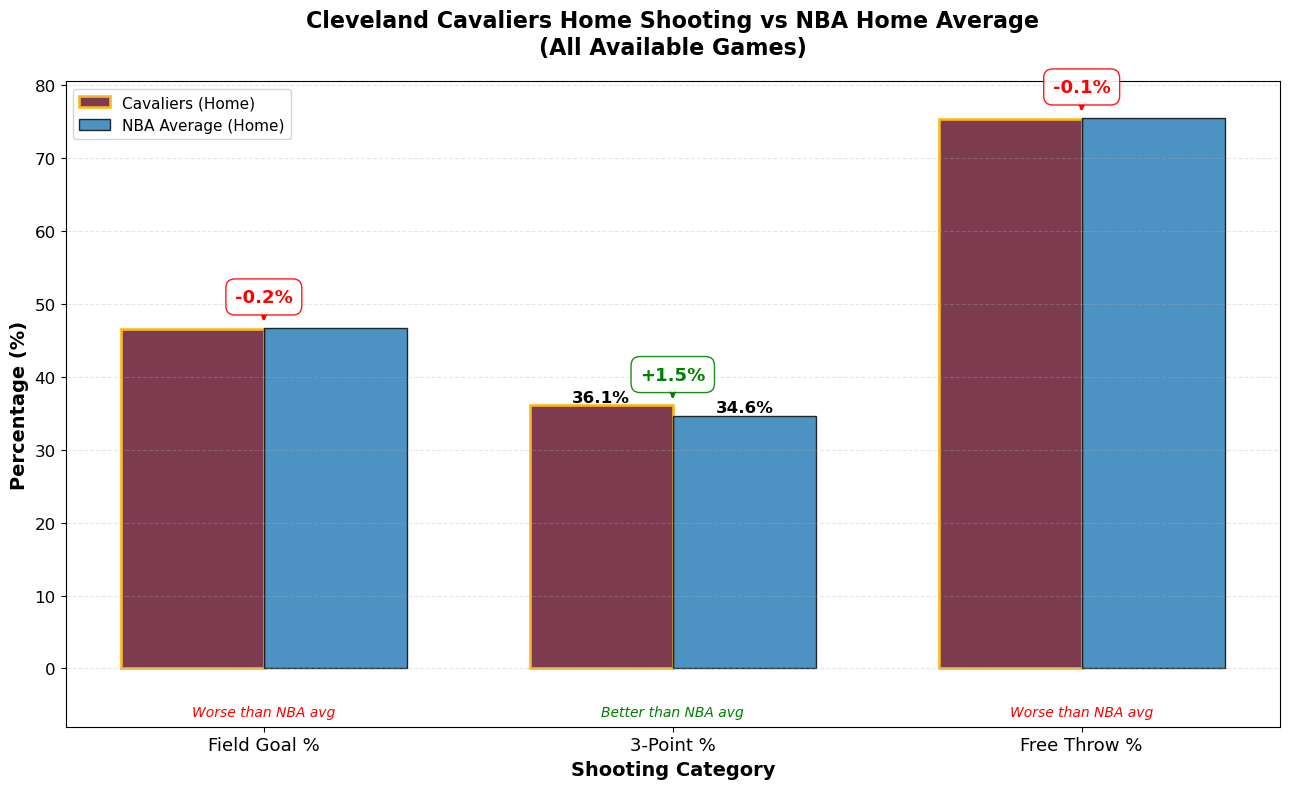

In [56]:
# Visualization
plt.figure(figsize=(13, 8))

x = np.arange(len(comparison_df))
width = 0.35

# Cavs colors: #6F263D (wine) and #FFB81C (gold)
bars1 = plt.bar(
    x - width/2,
    comparison_df['Cavaliers (Home)'],
    width,
    label='Cavaliers (Home)',
    color='#6F263D',
    alpha=0.9,
    edgecolor='#FFB81C',
    linewidth=2
)

bars2 = plt.bar(
    x + width/2,
    comparison_df['NBA Average (Home)'],
    width,
    label='NBA Average (Home)',
    color='#1f77b4',
    alpha=0.8,
    edgecolor='black',
    linewidth=1
)

# Customize plot
plt.xlabel('Shooting Category', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.title(
    'Cleveland Cavaliers Home Shooting vs NBA Home Average\n(All Available Games)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xticks(x, comparison_df['Category'], fontsize=13)
plt.yticks(fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f}%', ha='center', va='bottom',
            fontsize=12, fontweight='bold',
            color='white' if height > 45 else 'black'
        )

# Add difference annotations with arrows
for i, row in comparison_df.iterrows():
    cavs_value = row['Cavaliers (Home)']
    nba_value = row['NBA Average (Home)']
    difference = row['Difference']
    
    diff_text = f"+{difference:.1f}%" if difference > 0 else f"{difference:.1f}%"
    max_height = max(cavs_value, nba_value)

    # Color depending on direction
    if difference > 0:
        arrow_color = 'green'
        arrow_text = "Better than NBA avg"
    else:
        arrow_color = 'red'
        arrow_text = "Worse than NBA avg"

    # Arrow
    plt.annotate(
        '',
        xy=(i, max_height + 0.5),
        xytext=(i, max_height + 2),
        arrowprops=dict(arrowstyle='->', color=arrow_color, lw=2)
    )

    # Difference number
    plt.text(
        i, max_height + 3, diff_text,
        ha='center', va='bottom',
        fontweight='bold', fontsize=13,
        color=arrow_color,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                  edgecolor=arrow_color, alpha=0.9)
    )

    # Label under x-axis
    plt.text(
        i, -5, arrow_text,
        ha='center', va='top', fontsize=10,
        color=arrow_color, style='italic'
    )

# Adjust y-axis to make room for annotations
plt.ylim(
    -8,
    max(
        comparison_df['Cavaliers (Home)'].max(),
        comparison_df['NBA Average (Home)'].max()
    ) + 5
)

plt.tight_layout()
plt.show()



## Nothing very noticable

## Now lets see how much home court advantage within close games effects the outcome! To calculate this I am going to check games that finish within 4 points

In [61]:
# Calculate point differential
games['point_diff'] = games['pts_home'] - games['pts_away']
games['abs_point_diff'] = abs(games['point_diff'])

# Filter for clutch games (0-4 points)
clutch_games = games[games['abs_point_diff'] <= 4]

In [62]:
print("=== CLUTCH GAMES ANALYSIS (0-4 points) ===")
print(f"Total clutch games: {len(clutch_games):,}")

# Calculate win rates IN CLUTCH GAMES
clutch_home_wins = (clutch_games['wl_home'] == 'W').sum()
clutch_home_win_rate = clutch_home_wins / len(clutch_games)

clutch_away_wins = (clutch_games['wl_away'] == 'W').sum()
clutch_away_win_rate = clutch_away_wins / len(clutch_games)

print(f"\n=== WIN RATES IN CLUTCH GAMES ===")
print(f"Home teams win: {clutch_home_win_rate:.1%} ({clutch_home_wins:,} wins)")
print(f"Away teams win: {clutch_away_win_rate:.1%} ({clutch_away_wins:,} wins)")
print(f"Home advantage in clutch: {clutch_home_win_rate - clutch_away_win_rate:+.1%}")



=== CLUTCH GAMES ANALYSIS (0-4 points) ===
Total clutch games: 15,019

=== WIN RATES IN CLUTCH GAMES ===
Home teams win: 54.2% (8,147 wins)
Away teams win: 45.7% (6,871 wins)
Home advantage in clutch: +8.5%


In [60]:
# Calculate win rates
clutch_home_wins = (clutch_games['wl_home'] == 'W').sum()
clutch_home_win_rate = clutch_home_wins / len(clutch_games)
overall_home_win_rate = (games['wl_home'] == 'W').mean()

print(f"Home win rate in clutch games: {clutch_home_win_rate:.1%}")
print(f"Home win rate overall: {overall_home_win_rate:.1%}")
print(f"Difference: {clutch_home_win_rate - overall_home_win_rate:+.1%}")


Home win rate in clutch games: 54.2%
Home win rate overall: 61.9%
Difference: -7.6%


/var/folders/m3/y8lj06jd1jnby6zyttfn2p1m0000gn/T/ipykernel_80422/3313911396.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


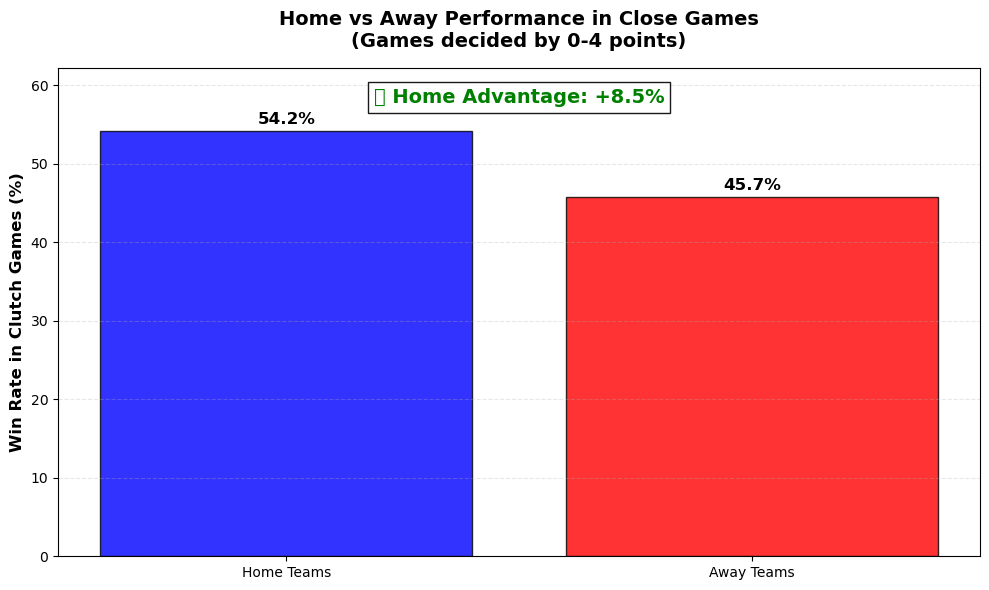

In [64]:
plt.figure(figsize=(10, 6))
categories = ['Home Teams', 'Away Teams']
win_rates = [clutch_home_win_rate * 100, clutch_away_win_rate * 100]
colors = ['Blue', 'Red']

bars = plt.bar(categories, win_rates, color=colors, alpha=0.8, edgecolor='black')

# Add value labels
for bar, rate in zip(bars, win_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

# Add home advantage arrow
home_advantage = (clutch_home_win_rate - clutch_away_win_rate) * 100
trend_color = 'green'
trend_text = f"📈 Home Advantage: +{home_advantage:.1f}%"

plt.text(0.5, max(win_rates) + 3, trend_text, 
         ha='center', va='bottom', fontsize=14, fontweight='bold',
         color=trend_color, bbox=dict(facecolor='white', alpha=0.9))

plt.ylabel('Win Rate in Clutch Games (%)', fontsize=12, fontweight='bold')
plt.title('Home vs Away Performance in Close Games\n(Games decided by 0-4 points)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ylim(0, max(win_rates) + 8)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


## Now Lets check for the Cavaliers!

In [65]:
# Get Cavs clutch games
cavs_clutch_home = clutch_games[clutch_games['team_name_home'] == 'Cleveland Cavaliers']
cavs_clutch_away = clutch_games[clutch_games['team_name_away'] == 'Cleveland Cavaliers']

if len(cavs_clutch_home) > 0 or len(cavs_clutch_away) > 0:
    # Calculate Cavs win rates in clutch
    cavs_clutch_home_wins = (cavs_clutch_home['wl_home'] == 'W').sum() if len(cavs_clutch_home) > 0 else 0
    cavs_clutch_home_rate = cavs_clutch_home_wins / len(cavs_clutch_home) if len(cavs_clutch_home) > 0 else 0
    
    cavs_clutch_away_wins = (cavs_clutch_away['wl_away'] == 'W').sum() if len(cavs_clutch_away) > 0 else 0
    cavs_clutch_away_rate = cavs_clutch_away_wins / len(cavs_clutch_away) if len(cavs_clutch_away) > 0 else 0
    
    print(f"Cavs home clutch games: {len(cavs_clutch_home)}")
    print(f"Cavs away clutch games: {len(cavs_clutch_away)}")
    

Cavs home clutch games: 481
Cavs away clutch games: 473


In [72]:
if len(cavs_clutch_home) > 0:
    print(f"Cavs home clutch: {cavs_clutch_home_wins}-{len(cavs_clutch_home) - cavs_clutch_home_wins} ({cavs_clutch_home_rate:.1%})")

if len(cavs_clutch_away) > 0:
    print(f"Cavs away clutch: {cavs_clutch_away_wins}-{len(cavs_clutch_away) - cavs_clutch_away_wins} ({cavs_clutch_away_rate:.1%})")

# Calculate Cavs home advantage in clutch
if len(cavs_clutch_home) > 0 and len(cavs_clutch_away) > 0:
    cavs_clutch_home_advantage = cavs_clutch_home_rate - cavs_clutch_away_rate
    
    print(f"\nCavs home advantage in clutch: {cavs_clutch_home_advantage:+.1%}")
    print(f"League home advantage in clutch: {(clutch_home_win_rate - clutch_away_win_rate):+.1%}")


Cavs home clutch: 255-226 (53.0%)
Cavs away clutch: 223-250 (47.1%)

Cavs home advantage in clutch: +5.9%
League home advantage in clutch: +8.5%


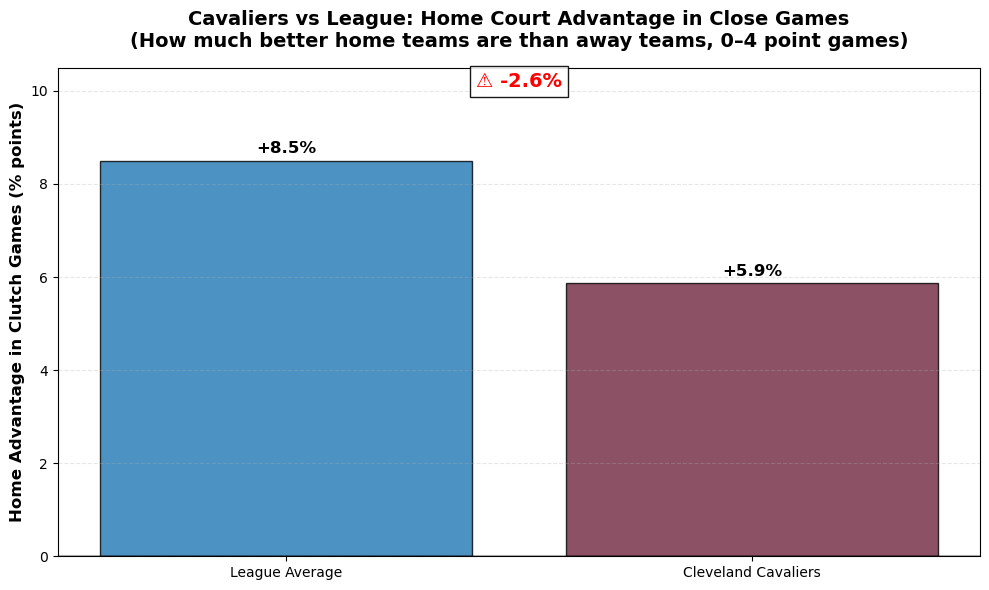

In [74]:
# Bar chart: Cavs vs League Home Advantage in Clutch
plt.figure(figsize=(10, 6))

categories = ['League Average', 'Cleveland Cavaliers']
advantages = [
    (clutch_home_win_rate - clutch_away_win_rate) * 100,
    cavs_clutch_home_advantage * 100
]
colors = ['#1f77b4', '#6F263D']

bars = plt.bar(categories, advantages, color=colors, alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar, advantage in zip(bars, advantages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2., height + 0.1,
        f'+{advantage:.1f}%',
        ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )

plt.ylabel('Home Advantage in Clutch Games (% points)', fontsize=12, fontweight='bold')
plt.title(
    'Cavaliers vs League: Home Court Advantage in Close Games\n'
    '(How much better home teams are than away teams, 0–4 point games)',
    fontsize=14,
    fontweight='bold',
    pad=15
)

plt.ylim(0, max(advantages) + 2)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add comparison arrow/text box
diff = advantages[1] - advantages[0]
trend_color = 'green' if diff > 0 else 'red'
trend_symbol = '✅' if diff > 0 else '⚠️'
trend_text = f"{trend_symbol} {diff:+.1f}%"

plt.text(
    0.5, max(advantages) + 1.5,
    trend_text,
    ha='center', va='bottom',
    fontsize=14,
    fontweight='bold',
    color=trend_color,
    bbox=dict(facecolor='white', alpha=0.9)
)

plt.tight_layout()
plt.show()



## Very interesting! the Cavs are slightly below league average at winning home games in the clutch!

## Results

# What I did with the Data

## I Downloaded Dataset from Kaggle, loaded multiple csv files. To clean the data and prepare it, I found NaN and missing values in stats, used .dropna(). Another preperation tactic I used was extracting point differental which was just points_home - points - away, and used absolute point differential. For analysis I calculated home win averages and away win rate averages. I also compared shooting percentages. I then broke down Team specific for the cavs. My final analysis was for clutch games to see how teams perform at home in the clutch. My statistical calculations involved some simple lines of code. For win rates I used home_win_rate = (games['wl_home'] == 'W').sum() / len(games). For shooting percentages I used # Convert decimal to percentage, handle missing values fg_percent_home = games['fg_pct_home'].dropna().mean() * 100. For point differentials I used games['point_diff'] = games['pts_home'] - games['pts_away']games['abs_point_diff'] = abs(games['point_diff']) clutch_games = games[games['abs_point_diff'] <= 4]. I then visualized these with advanced Bar graphs that I learned how to use through personal research.  

# What I learned

## I learned that Shooting averages are better at home, but barely! Also that home win rate is much higher and home teams perform around 8% better in the clutch time games. I also learned that the cavs have very similiar home stats compared to the league average if not slightly below average!